In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats
URL='http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'

In [100]:
df = pd.read_csv(URL)
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [72]:
x = df['hs_grad']
y = df['poverty']
n = len(x)

x_mean = x.mean()
y_mean = y.mean()
df[['hs_grad', 'poverty']].describe()

,hs_grad,poverty
count,51.000000,51.000000
mean,86.011765,11.349020
std,3.725998,3.099185
min,77.200000,5.600000
25%,83.300000,9.250000
50%,86.900000,10.600000
75%,88.700000,13.400000
max,92.100000,18.000000


In [42]:
df.hs_grad.count()

51

Different ways of standart diviation calculations:

In [73]:
math_SDx = np.sqrt(np.sum((x-x_mean)**2)/(n-1))
math_SDy = np.sqrt(np.sum((y-y_mean)**2)/(n-1))
math_SDy

3.0991852186676168

In [58]:
pandas_SDx = x.std()
pandas_SDy = y.std()
pandas_SDy

3.0991852186676168

In [61]:
np_SDx = np.std(x, ddof = 1)
np_SDy = np.std(y, ddof = 1)

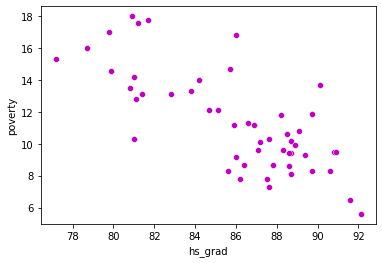

In [30]:
sns.scatterplot(x='hs_grad', y='poverty', data=df, color='m')

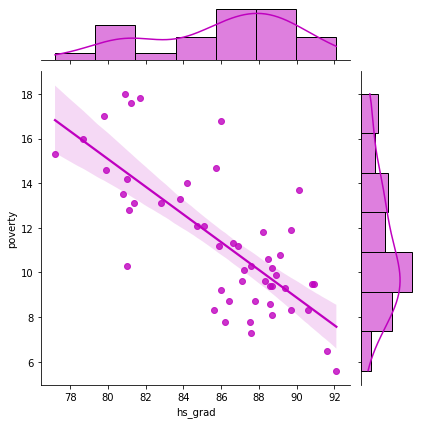

In [31]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

In [65]:
pandas_corr = df[['hs_grad', 'poverty']].corr(method ='pearson')
pandas_corr

In [68]:
np_corr = np.corrcoef(x, y)
np_corr

array([[ 1.        , -0.74685825],
       [-0.74685825,  1.        ]])

In [69]:
numpycov = np.cov(x, y)[0][1]
numpycov

-8.624388235294111

In [70]:
pandascov = df[['hs_grad', 'poverty']].cov().iloc[0,1]
pandascov

-8.624388235294111

In [74]:
mathcov = sum((x-x_mean)*(y-y_mean))/(n-1)
mathcov

-8.624388235294111

In [87]:
math_corr = mathcov/(math_SDx*math_SDy)
math_corr

-0.7468582531582505

In [104]:
Rsquared = math_corr**2
Rsquared

0.5577972503105934

Рассчитаем b_1 (угол наклона регрессионной прямой) математическим способом.

In [88]:
math_b_1 = (math_SDy/math_SDx)*math_corr
math_b_1

-0.6212167177940103

Рассчитаем b_0 (интерсепт) математическим способом.

In [92]:
math_b_0 = y_mean-(math_b_1*x_mean)
math_b_0

64.78096577010207

In [96]:
predicted_y = math_b_0 + (math_b_1*x)

In [97]:
result = sm.ols(formula="poverty ~  hs_grad", data=df).fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           3.11e-10
Time:                        14:42:45   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
stats.linregress(x,y)

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)

In [ ]:
math_b_1/